In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


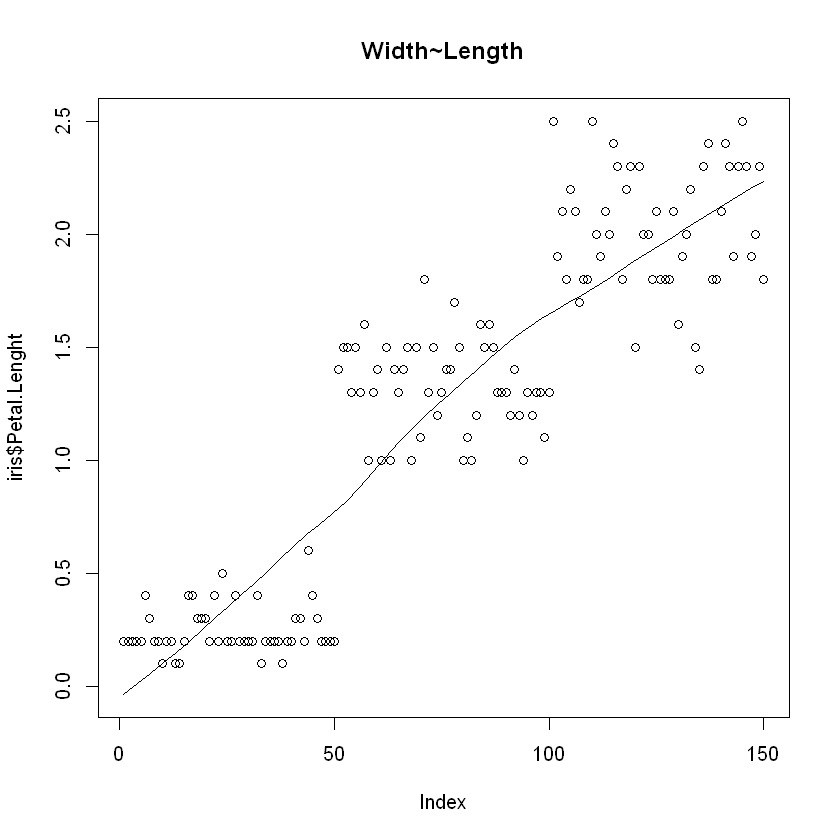

In [3]:
scatter.smooth(x=iris$Petal.Width, y=iris$Petal.Lenght, main='Width~Length')

In [11]:
install.packages(gridExtra)

ERROR: Error in install.packages(gridExtra): object 'gridExtra' not found


In [10]:
library('ggplot2')
libarry('gridExtra')

ERROR: Error in libarry("gridExtra"): could not find function "libarry"


`geom_smooth()` using formula 'y ~ x'



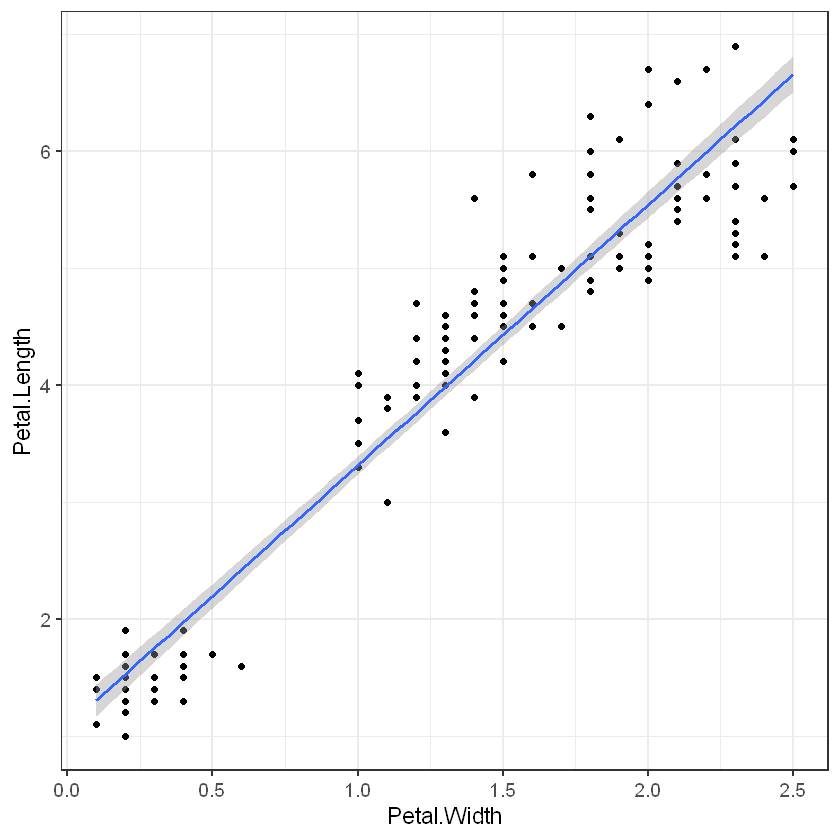

In [9]:
plot <- ggplot(iris, aes(Petal.Width,Petal.Length)) +
        geom_point() + geom_smooth(method='lm') +
        theme_bw(base_size=14)
plot

- Dữ liệu theo liner regression phân nhóm
- Length ~ Width tương quan thuận

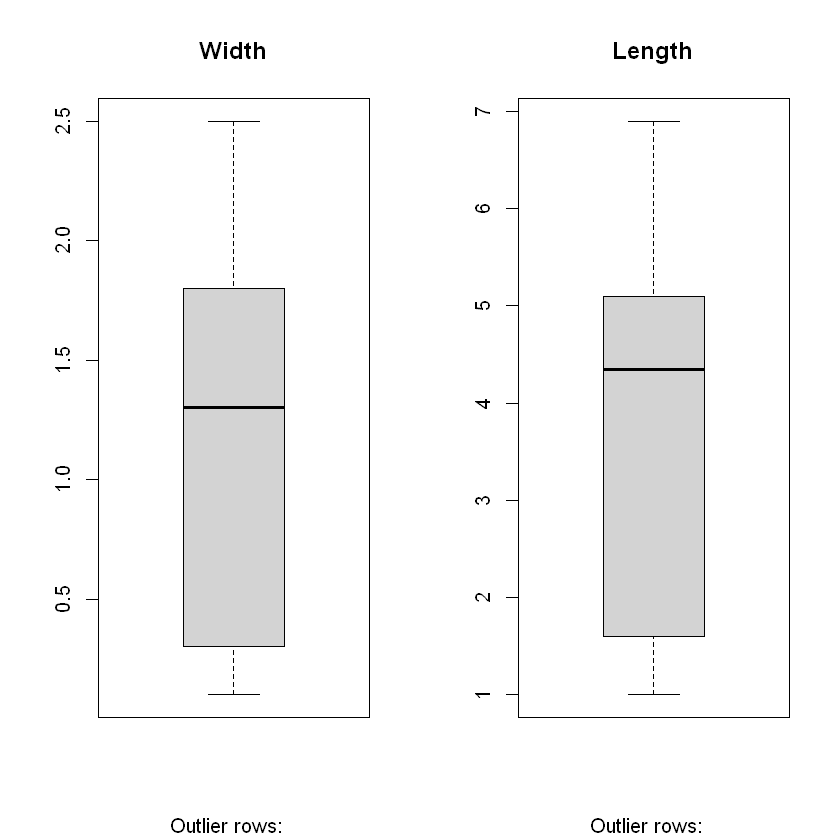

In [13]:
par(mfrow=c(1,2))
boxplot(iris$Petal.Width, main='Width',
      sub=paste('Outlier rows: ', boxplot.stats(iris$Petal.Width)$out))
boxplot(iris$Petal.Length, main='Length',
      sub=paste('Outlier rows: ', boxplot.stats(iris$Petal.Length)$out))

=> Width & Length not outlier

In [14]:
print(cor(iris$Petal.Width,iris$Petal.Length))

[1] 0.9628654


In [15]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(iris), 0.7*nrow(iris))
print(trainingRowIndex)
trainingData <- iris[trainingRowIndex,]
testData <- iris[-trainingRowIndex,]
print(nrow(trainingData))
print(nrow(testData))

  [1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103
[1] 105
[1] 45


In [16]:
lmMod <- lm(Petal.Length~ Petal.Width, data=trainingData)
lmMod


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Coefficients:
(Intercept)  Petal.Width  
      1.042        2.253  


In [29]:
iPred <- predict(lmMod, testData)
# iPred

In [19]:
mse <- mean(lmMod$residuals^2)
print(paste('mse train: ',mse))

[1] "mse:  0.229979417628902"


In [22]:
mse_test <- mean((testData$Petal.Length - iPred)^2)
print(paste('mse in test: ',mse_test))

[1] "mse in test:  0.217171445068203"


In [25]:
iPred_train <- predict(lmMod, trainingData)
# iPred_train

In [37]:
rsquare_train <- 1- sum((trainingData$Petal.Length - iPred_train)^2)/
 sum((trainingData$Petal.Length - mean(trainingData$Petal.Length))^2)

In [31]:
rsquare_test <- 1- sum((testData$Petal.Length - iPred)^2) /sum((testData$Petal.Length - mean(testData$Petal.Length))^2)

In [33]:
rsquare_train/rsquare_test 

[1] 1.003345

In [35]:
rsquare_test

[1] 0.9236422

In [39]:
rsquare_train

[1] 0.9267319

- RSquare test & RSquare train > 92% 
- RSquare train ~ RSquare test Model non overfiting
- MSE test = 0.2171 Mean of Square Error very low

In [38]:
print(summary(lmMod))


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3496 -0.2976  0.0076  0.2329  1.4037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04175    0.08562   12.17   <2e-16 ***
Petal.Width  2.25325    0.06243   36.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4842 on 103 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.926 
F-statistic:  1303 on 1 and 103 DF,  p-value: < 2.2e-16



In [52]:
print(coef(lmMod))
beta_width <- coef(lmMod)['Petal.Width']
beta_width

(Intercept) Petal.Width 
   1.041753    2.253255 


Petal.Width 
   2.253255

Petal.Width 
   2.253255

In [48]:
intercept <- coef(lmMod)['(Intercept)']

In [49]:
intercept

(Intercept) 
   1.041753

In [53]:
x <- c(0.9,1.5,2.1)
y <- intercept + beta_width*x

In [54]:
y1 <- predict(lmMod, data.frame(Petal.Width=x))

In [55]:
print(y1)

       1        2        3 
3.069683 4.421636 5.773588 


In [ ]:
plot()